c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


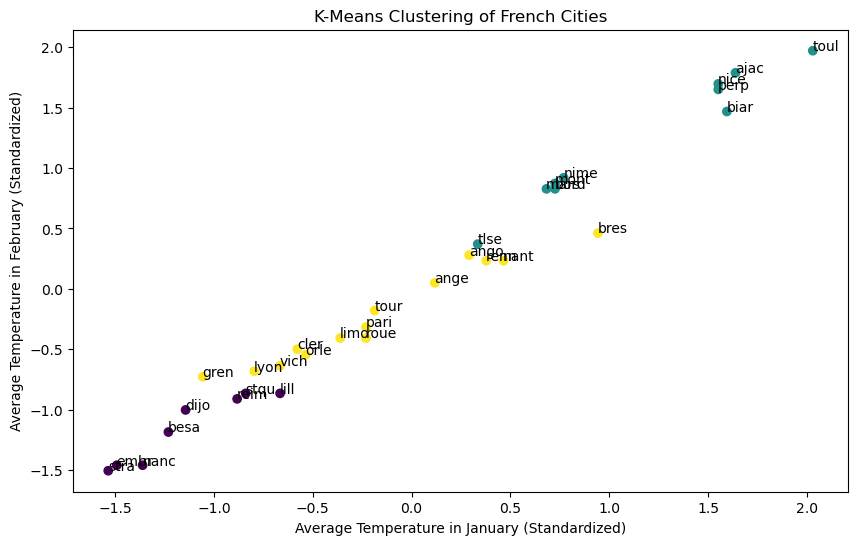

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the "villes.csv" dataset
data = pd.read_csv('villes.csv', sep=';')

# Extract temperature data (columns 1 to 13)
X = data.iloc[:, 1:14].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Create a scatter plot of the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering of French Cities")
plt.xlabel("Average Temperature in January (Standardized)")
plt.ylabel("Average Temperature in February (Standardized)")

# Annotate data points with the city names
labels = data.iloc[:, 0].values
for label, x, y in zip(labels, X_scaled[:, 0], X_scaled[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()


**Analysis**
Paris and Tour have a common or at least close weather, who would have thought!!

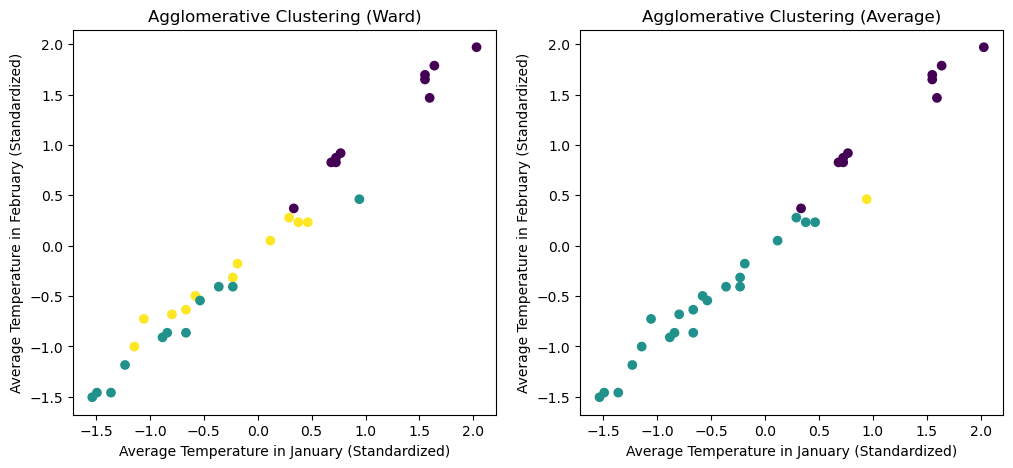

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 3 clusters using 'ward' linkage
ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_scaled)

# Apply Agglomerative Clustering with 3 clusters using 'average' linkage
average_clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X_scaled)

# Create scatter plots for both methods
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ward_clustering, cmap='viridis')
plt.title('Agglomerative Clustering (Ward)')
plt.xlabel("Average Temperature in January (Standardized)")
plt.ylabel("Average Temperature in February (Standardized)")

plt.subplot(122)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=average_clustering, cmap='viridis')
plt.title('Agglomerative Clustering (Average)')
plt.xlabel("Average Temperature in January (Standardized)")
plt.ylabel("Average Temperature in February (Standardized)")

plt.show()


**Analysis**
in the Ward method the groups are closely or at least evenly destributed, unlike in the Average method the yellow cluster has only one city for exemple!!

In [4]:
from sklearn import metrics

best_score = -1
best_clusters = -1

for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i, random_state=0).fit_predict(X_scaled)
    score = metrics.silhouette_score(X_scaled, clustering, metric='euclidean')
    
    if score > best_score:
        best_score = score
        best_clusters = i

print(f"The best number of clusters for K-Means is {best_clusters} with a Silhouette score of {best_score:.2f}")


c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mstzk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

The best number of clusters for K-Means is 2 with a Silhouette score of 0.63


**Analysis**

K-Means clustering performed optimally with two clusters, as indicated by a high Silhouette score of 0.63, indicating well-defined and distinct clusters. This result indicates strong separation between data points within each cluster, providing a robust partitioning of the data into two groups.